In [1]:
import astropy
import matplotlib
import numpy as np

check all packages
conda install -c conda-forge/label/cf202003 aplpy

## NVSS map

In [2]:
from astropy.io import fits
nvss = fits.open('nvss.fits')
nvss

In [3]:
nvss.info()

Filename: nvss.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (183, 183, 1, 1)   float32   


In [4]:
nvss[0]

In [5]:
nvss[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  183 / length of data axis 1                          
NAXIS2  =                  183 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'No_Name '           / Name of object                                 
TELESCOP= 'VLA     '           / Telescope used                                 
INSTRUME= 'L-BAND  '        

In [6]:
data = nvss[0].data
data

array([[[[-1.5899667e-03, -1.5440471e-03, -1.4521204e-03, ...,
          -5.1385585e-05,  7.8861282e-05,  1.7965698e-04],
         [-1.6336972e-03, -1.5792174e-03, -1.4763299e-03, ...,
          -1.2175984e-04,  4.0600149e-05,  1.7146283e-04],
         [-1.6546984e-03, -1.5919828e-03, -1.4762150e-03, ...,
          -2.0282931e-04, -1.3128659e-05,  1.4633354e-04],
         ...,
         [ 5.6323252e-04,  4.2763591e-04,  1.9772307e-04, ...,
          -3.9874396e-04, -4.4731863e-04, -4.8541182e-04],
         [ 5.9139315e-04,  4.6505270e-04,  2.4214356e-04, ...,
          -3.3015062e-04, -3.8969572e-04, -4.3619878e-04],
         [ 6.4271217e-04,  5.2799977e-04,  3.0671759e-04, ...,
          -2.3433294e-04, -3.0595640e-04, -3.6392553e-04]]]],
      dtype=float32)

In [7]:
type(data)

numpy.ndarray

In [8]:
data.shape

(1, 1, 183, 183)

In [9]:
data.dtype.name

'float32'

In [10]:
#np.savetxt('galaxy_result.txt',data_reshape2)

In [11]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

Min: -0.010027932
Max: 2.3779101
Mean: 0.02909539
Stdev: 0.16649677


In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(data)

TypeError: Invalid shape (1, 1, 183, 183) for image data

In [13]:
data_reshape1 = data.reshape(183,183)
#data_reshape2 = data_reshape1

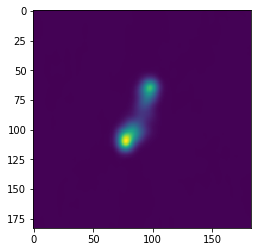

In [14]:
plt.imshow(data_reshape1)

In [15]:
data_reshape2 = data_reshape1[::-1,:]
print(data_reshape2)

[[ 6.4271217e-04  5.2799977e-04  3.0671759e-04 ... -2.3433294e-04
  -3.0595640e-04 -3.6392553e-04]
 [ 5.9139315e-04  4.6505270e-04  2.4214356e-04 ... -3.3015062e-04
  -3.8969572e-04 -4.3619878e-04]
 [ 5.6323252e-04  4.2763591e-04  1.9772307e-04 ... -3.9874396e-04
  -4.4731863e-04 -4.8541182e-04]
 ...
 [-1.6546984e-03 -1.5919828e-03 -1.4762150e-03 ... -2.0282931e-04
  -1.3128659e-05  1.4633354e-04]
 [-1.6336972e-03 -1.5792174e-03 -1.4763299e-03 ... -1.2175984e-04
   4.0600149e-05  1.7146283e-04]
 [-1.5899667e-03 -1.5440471e-03 -1.4521204e-03 ... -5.1385585e-05
   7.8861282e-05  1.7965698e-04]]


<IPython.core.display.Javascript object>


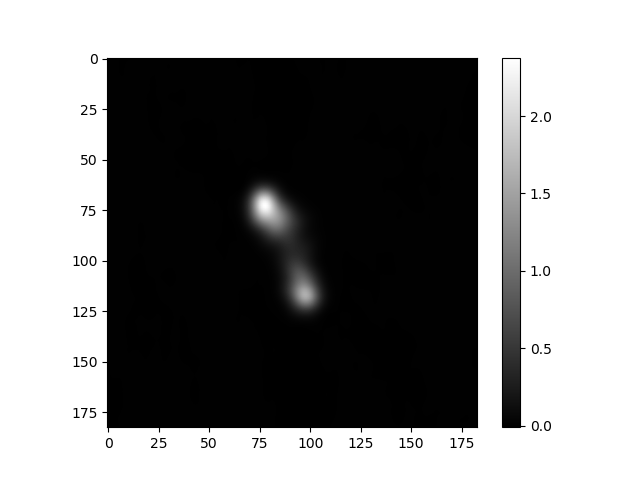

In [16]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(data_reshape2, cmap='gray',interpolation='bilinear')
plt.colorbar()

<IPython.core.display.Javascript object>


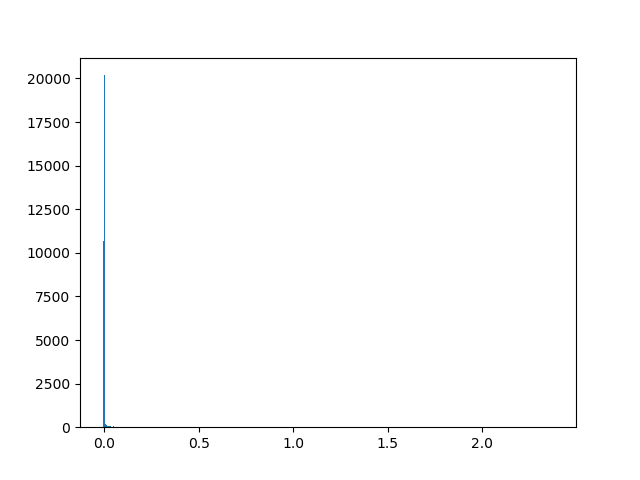

In [17]:
histogram = plt.hist(data_reshape2.flat, bins=500)

In [18]:
import numpy as np
rms_nvss = 0.45E-3
levs = [3, 6, 12, 24, 48, 96.00, 192.00, 384.00, 768, 1536, 3072, 6144, 12288, 15000, 17500]
levs_np = np.array(levs)
levs_np = rms_nvss*levs_np
levs_np

array([1.3500e-03, 2.7000e-03, 5.4000e-03, 1.0800e-02, 2.1600e-02,
       4.3200e-02, 8.6400e-02, 1.7280e-01, 3.4560e-01, 6.9120e-01,
       1.3824e+00, 2.7648e+00, 5.5296e+00, 6.7500e+00, 7.8750e+00])

<IPython.core.display.Javascript object>


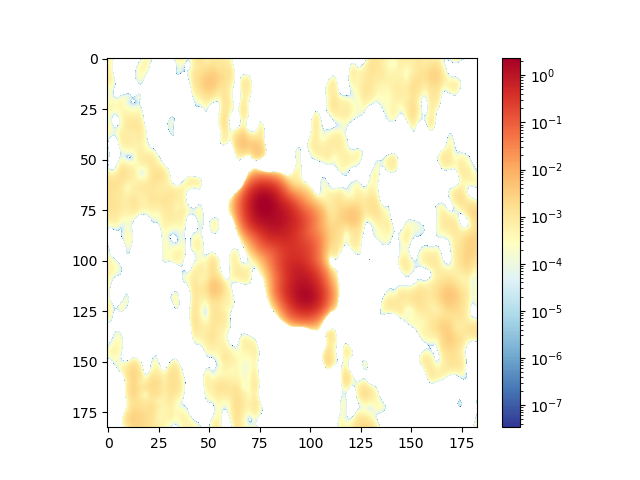

In [19]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
#plt.contour(data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_colorscale.png')

<IPython.core.display.Javascript object>


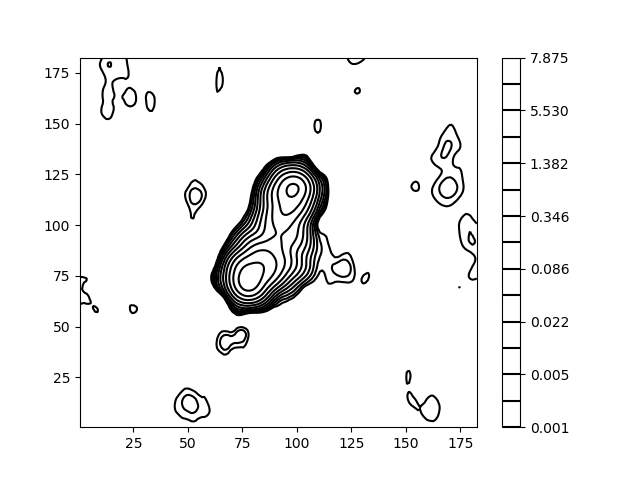

In [20]:
from matplotlib.colors import LogNorm
from matplotlib import cm

#plt.imshow(data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
plt.contour(data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_contour.png')

<IPython.core.display.Javascript object>


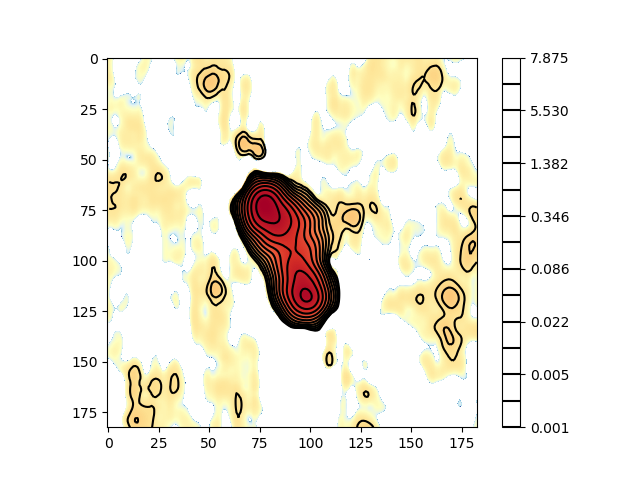

In [21]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(data_reshape2, cmap='RdYlBu_r', norm=LogNorm(),interpolation='bilinear')
plt.contour(data_reshape1, levs_np, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('nvss_final.png')

## TGSS-ADR image

In [22]:
from astropy.io import fits
tgss = fits.open('tgss.FITS')
tgss

In [23]:
tgss.info()

Filename: tgss.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   (145, 147, 1, 1)   float32   


In [24]:
tgss[0]

In [25]:
tgss[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  145                                                  
NAXIS2  =                  147                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'R12D40  '           /Source name                                     
TELESCOP= 'GMRT    '           /                                                
INSTRUME= '153MHZ  '           /                                                
OBSERVER= 'TGSS    '           /                                                
DATE-OBS= '2016-03-15'      

In [26]:
data1 = tgss[0].data
data1

array([[[[ 0.01297904,  0.01039764,  0.00722382, ..., -0.00206061,
          -0.00040908,  0.00342336],
         [ 0.01249284,  0.01017758,  0.0067696 , ...,  0.00014668,
           0.00193642,  0.00535048],
         [ 0.01159293,  0.00973091,  0.00641127, ...,  0.00220528,
           0.00362335,  0.00599583],
         ...,
         [ 0.00906408,  0.0073412 ,  0.00437375, ..., -0.01405965,
          -0.01341639, -0.01099798],
         [ 0.01025794,  0.0091898 ,  0.00701237, ..., -0.00988408,
          -0.00990304, -0.00837065],
         [ 0.01047575,  0.01056446,  0.00962237, ..., -0.00590573,
          -0.00645281, -0.00582368]]]], dtype=float32)

In [27]:
type(data1)

numpy.ndarray

In [28]:
data1.shape

(1, 1, 147, 145)

In [29]:
data1.dtype.name

'float32'

In [30]:
#np.savetxt('galaxy_result.txt',data_reshape2)

In [31]:
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

Min: -0.010027932
Max: 2.3779101
Mean: 0.02909539
Stdev: 0.16649677


In [32]:
data1_reshape3 = data1.reshape(147, 145)
#data_reshape2 = data_reshape1

In [35]:
data1_reshape4 = data1_reshape3[::-1,:]
print(data1_reshape4)

[[ 0.01047575  0.01056446  0.00962237 ... -0.00590573 -0.00645281
  -0.00582368]
 [ 0.01025794  0.0091898   0.00701237 ... -0.00988408 -0.00990304
  -0.00837065]
 [ 0.00906408  0.0073412   0.00437375 ... -0.01405965 -0.01341639
  -0.01099798]
 ...
 [ 0.01159293  0.00973091  0.00641127 ...  0.00220528  0.00362335
   0.00599583]
 [ 0.01249284  0.01017758  0.0067696  ...  0.00014668  0.00193642
   0.00535048]
 [ 0.01297904  0.01039764  0.00722382 ... -0.00206061 -0.00040908
   0.00342336]]


<IPython.core.display.Javascript object>


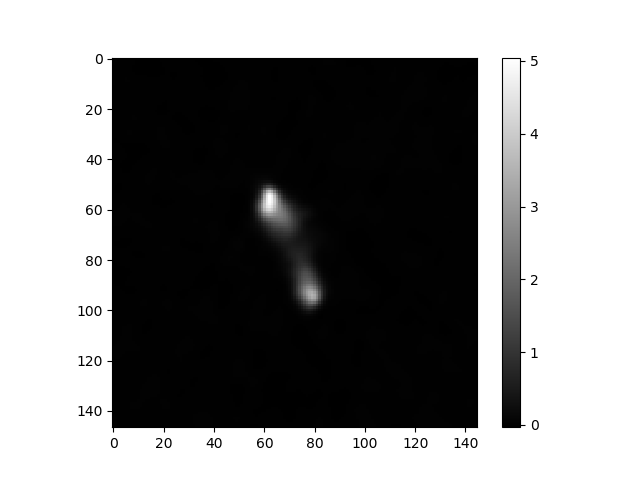

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(data1_reshape4, cmap='gray')
plt.colorbar()

<IPython.core.display.Javascript object>


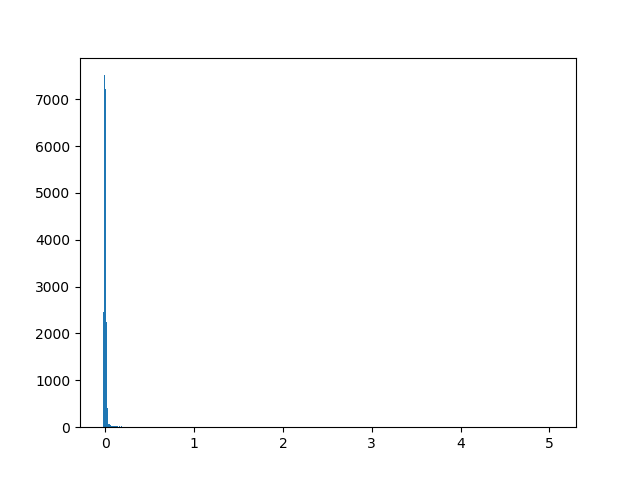

In [37]:
histogram = plt.hist(data1_reshape4.flat, bins=500)

In [38]:
import numpy as np
rms_tgss = 12E-3
#levs = [3.00, 4.24, 6.00, 8.49, 12.00, 16.97, 24.00, 33.94, 48.00, 67.88, 96.00, 135.76, 192.00, 271.53, 384.00]
levs_np = np.array(levs)
levs_np_tgss = rms_tgss*levs_np
levs_np_tgss

array([3.60000e-02, 7.20000e-02, 1.44000e-01, 2.88000e-01, 5.76000e-01,
       1.15200e+00, 2.30400e+00, 4.60800e+00, 9.21600e+00, 1.84320e+01,
       3.68640e+01, 7.37280e+01, 1.47456e+02, 1.80000e+02, 2.10000e+02])

<IPython.core.display.Javascript object>


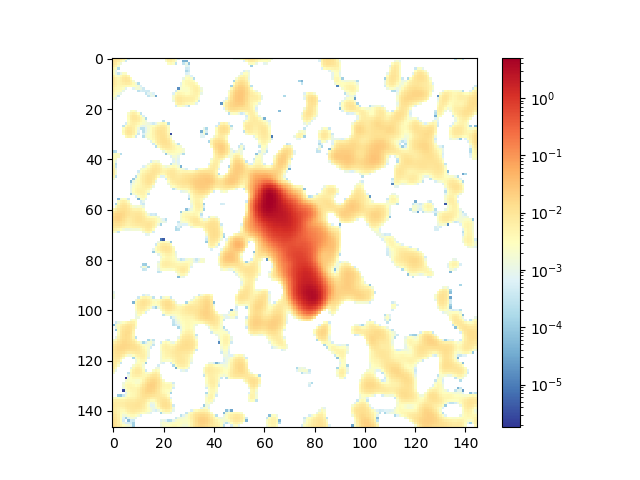

In [39]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(data1_reshape4, cmap='RdYlBu_r', norm=LogNorm())
#plt.contour(data1_reshape1, levs_np_ugmrt, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_colorscale.png')

<IPython.core.display.Javascript object>


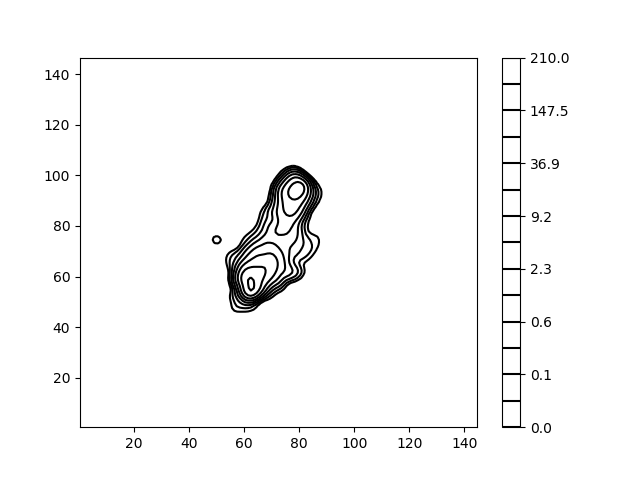

In [40]:
from matplotlib.colors import LogNorm
from matplotlib import cm

#plt.imshow(data1_reshape2, cmap='RdYlBu_r', norm=LogNorm(),vmin=12E-3,vmax=1)
plt.contour(data1_reshape3, levs_np_tgss, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_contour.png')

<IPython.core.display.Javascript object>


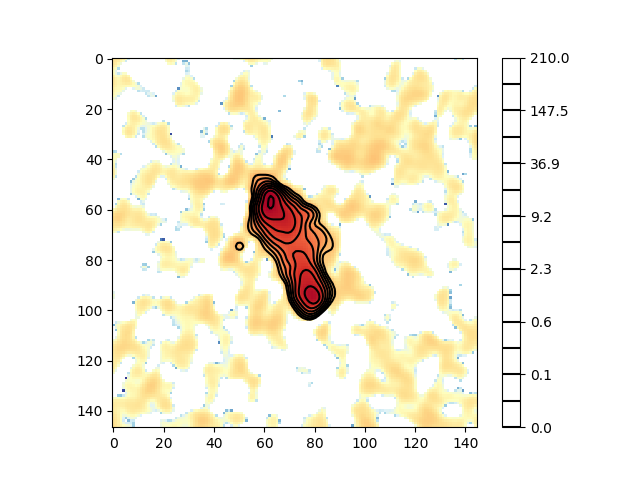

In [41]:
from matplotlib.colors import LogNorm
from matplotlib import cm

plt.imshow(data1_reshape4, cmap='RdYlBu_r', norm=LogNorm())
plt.contour(data1_reshape3, levs_np_tgss, colors='k', origin='upper')
cbar = plt.colorbar()
plt.savefig('tgss_final.png')

In [ ]:
help(plt.imshow)

# FITS handling with APLpy

In [42]:
import aplpy

INFO: Setting slices=[0, 0] [aplpy.core]


<IPython.core.display.Javascript object>


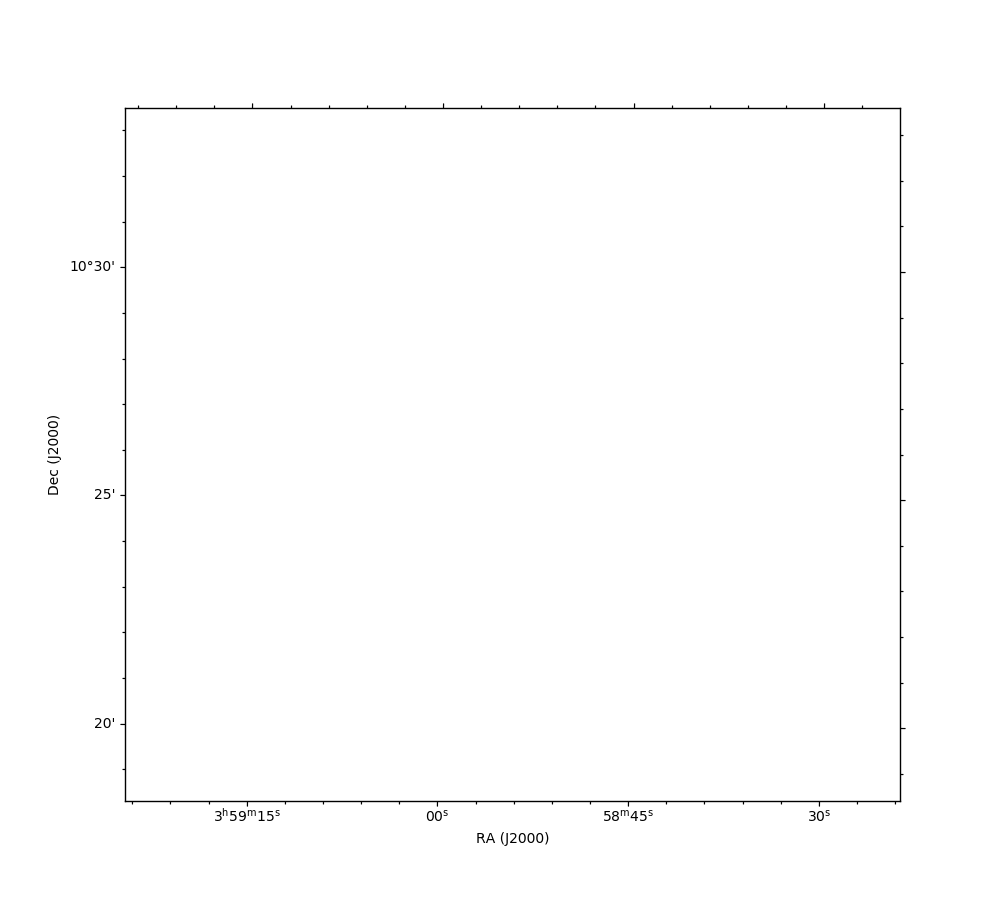

NameError: name 'data_reshape3' is not defined

In [45]:
import aplpy
%matplotlib notebook

gc = aplpy.FITSFigure('tgss.FITS')
'''
f1.add_beam()
beam.set_major(0.03) # degrees
beam.set_minor(0.02) # degrees
beam.set_angle(45.0) # degrees
f1.beam.set_color('white')
f1.beam.set_hatch('+')

f1.beam.show()
gc.add_beam()
gc.beam.show()
'''

#gc.show_ellipses(6h47m00s,9d58m00s, angle=0, layer=False, zorder=None, **kwargs)
gc.show_contour(data_reshape3,levels=10, colors=None,kernel='gauss', cmap='RdYlBu_r')
gc.show_colorscale(cmap='RdYlBu_r',vmin=120E-6,vmax=0.07,interpolation='bilinear')
#gc.add_scalebar(0.03, '0.5pc', color='white')

INFO: Setting slices=[0, 0] [aplpy.core]


<IPython.core.display.Javascript object>


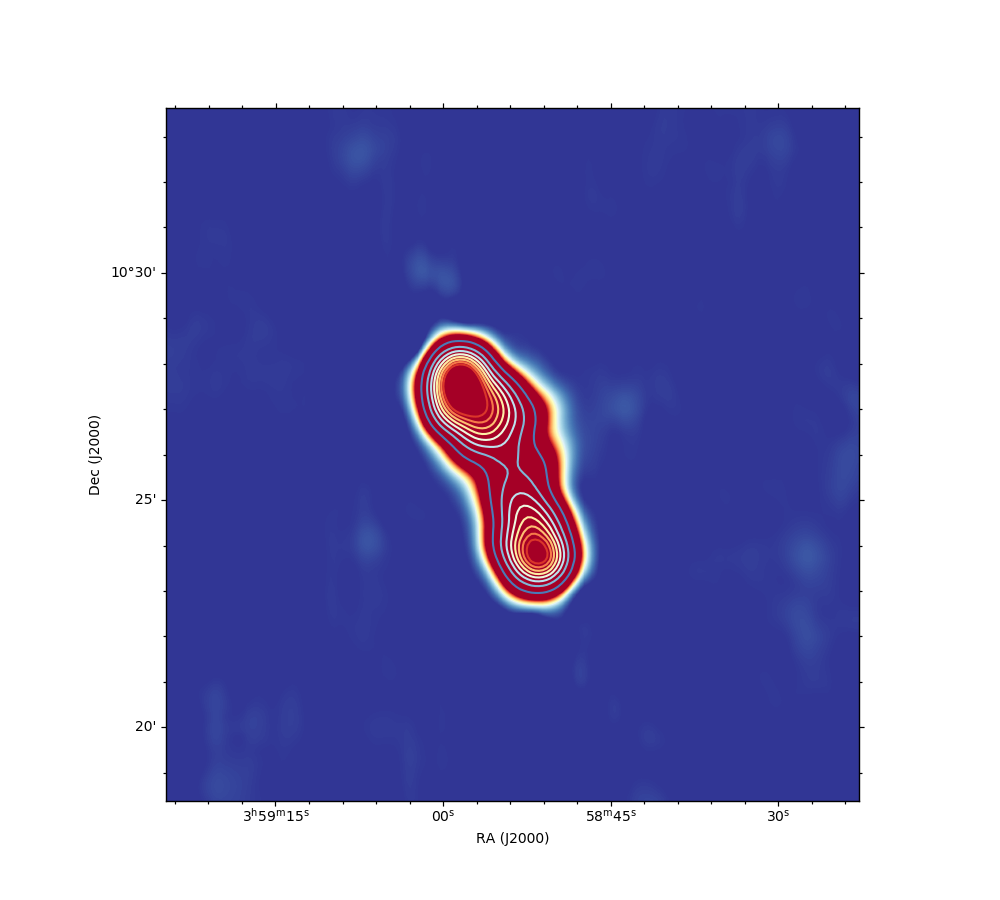

In [47]:
#nvss
import aplpy
%matplotlib notebook
f1 = aplpy.FITSFigure('nvss.fits')
'''
f1.add_beam()
beam.set_major(0.03) # degrees
beam.set_minor(0.02) # degrees
beam.set_angle(45.0) # degrees
f1.beam.set_color('white')
f1.beam.set_hatch('+')

f1.beam.show()
'''
#f1
#show_ellipses(xw, yw, width, height, angle=0, layer=False, zorder=None, **kwargs)
f1.show_contour(data_reshape1,levels=10, colors=None,kernel='gauss', cmap='RdYlBu_r')
f1.show_colorscale(cmap='RdYlBu_r',vmin=0.45E-3,vmax=0.07,interpolation='bilinear')
#gc.add_scalebar(0.03, '0.5pc', color='white')